In [5]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from PIL import Image

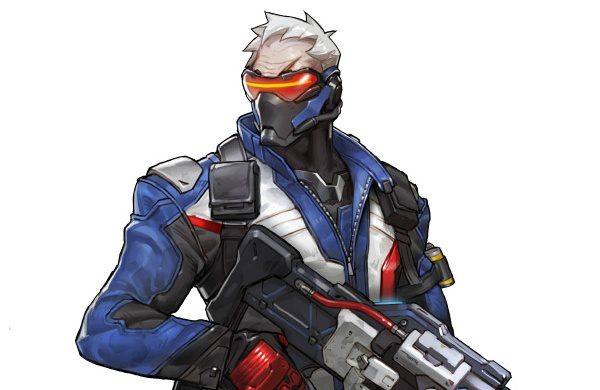

In [6]:
im = Image.open("솔져76.jpeg")
im

In [7]:
im= np.array(im)
print(im.shape)

(390, 600, 3)


In [8]:
label = np.ones([390,600])
M_size = 7
M=255*np.random.rand(M_size,3)
M_old = np.zeros([M_size,3])
im[0][0].__len__()


3

In [9]:
for i in range(30):
    print("Training Stage: {}".format(i))
    if(M_old.astype(int)==M.astype(int)).all():
        print("stop: {}".format(i))
        break
    M_old=M.copy()
    for i in range(im.__len__()):
        for j in range(im[0].__len__()):
            min=999999
            for k in range(M_size):
                if min >= np.sum(np.square(im[i][j]-M[k])):
                    min = np.sum(np.square(im[i][j]-M[k]))
                    label[i][j]=k

    avg_XandYandZ = np.zeros([M_size,3])
    count = np.zeros([M_size])
    for i in range(im.__len__()):
        for j in range(im[0].__len__()):
            count[int(label[i][j])] +=1
            avg_XandYandZ[int(label[i][j])]+=im[i][j]
    if not np.all(count):
        M=9*np.random.rand(M_size,3)
        continue
    for i in range(M_size):
        M[i] = avg_XandYandZ[i]/count[i]


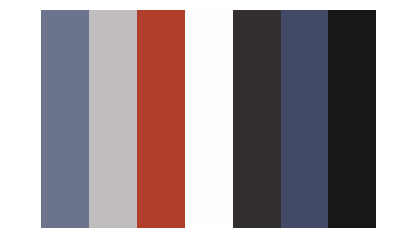

In [10]:
import matplotlib

fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(M_size):
    colorval = "#%02x%02x%02x" % (int(M[i][0]), int(M[i][1]), int(M[i][2]))
    rect = matplotlib.patches.Rectangle((-200+i*200,-100),200,200, color=colorval)
    ax.add_patch(rect)
plt.axis('off')
plt.xlim([-200,1200])
plt.ylim([-100,100])
plt.show()

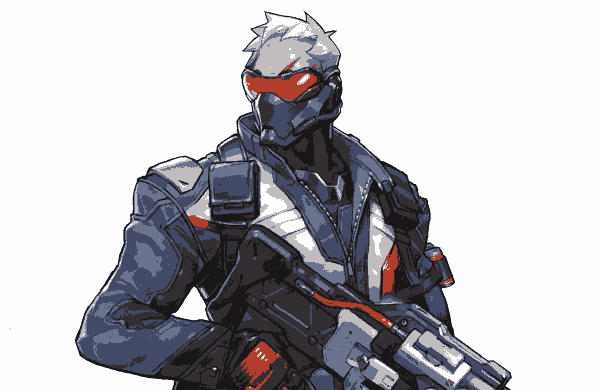

In [11]:
for i in range(im.__len__()):
        for j in range(im[0].__len__()):
            for k in range(3):
                im[i][j][k]= M[int(label[i][j])][k]
j = Image.fromarray(im)
j